In [1]:
from random import random, expovariate
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
n = 6  # número de guichês
lamb = 2  # taxa de entrada de clientes
mi = 2  # taxa de atendimentos a clientes por cada guichê
t = 50  # intervalo de tempo total sobre o qual se deseja calcular as médias de aceitações e rejeições
rodadas = 1000  # número de iterações da simulação

In [3]:
class Cliente:
    
    tempo_atendimento = -1
    
    def __init__(self, momento_chegada):
        self.momento_chegada = momento_chegada
    
    def vai_desistir(self, tam_fila):
        if (tam_fila / (tam_fila + n)) > random():
            return True
        return False

In [4]:
def momentos_chegada(tempo_total, lamb):
    momentos = set()  # garante que não haverão números repetidos
    for i in range(tempo_total):
        momentos.add(int(expovariate(lamb)))
    return sorted(momentos)

In [5]:
def rodada():
    fila = []
    guiches_ocupados = []
    atendidos = []
    rejeicoes = 0
    chegadas = momentos_chegada(t, lamb)
    for momento in range(t):
        
        # Libere guichês que ficaram vazios desde a última iteração
        for guiche in guiches_ocupados:
            if guiche.tempo_atendimento <= momento:
                # Se o guichê foi liberado, aumente o contador de clientes atendidos
                guiches_ocupados.remove(guiche)
                atendidos.append(guiche)
        
        # Se há clientes na fila, coloque-os em guichês livres (se houver algum)
        for cliente in fila:
            if len(guiches_ocupados) < n:
                # Aponte um guichê para esse cliente
                cliente.tempo_atendimento = momento + int(expovariate(mi))
                guiches_ocupados.append(cliente)
                
        # Descubra se um cliente chegou agora
        if momento in chegadas:
            cliente = Cliente(momento)
            # Calcule se o cliente irá permanecer na loja
            if cliente.vai_desistir(len(fila)):
                # Se não for, aumente o contador de rejeições
                rejeicoes += 1
            else:
                # Se ele for o único na fila, veja se ele pode ser atendido agora
                if(len(guiches_ocupados) < n):
                    # TODO: estabeleça o tempo correto de atendimento
                    cliente.tempo_atendimento = momento + int(expovariate(mi))
                    guiches_ocupados.append(cliente)
                else:
                    # Se não houver, coloque-o na fila
                    fila.append(cliente)

    return {
        'fila': fila,
        'giches_ocupados': guiches_ocupados,
        'atendidos': atendidos,
        'rejeicoes': rejeicoes
    }

In [6]:
iteracoes = []
for i in range(rodadas):
    iteracoes.append(rodada())

# Qual o número esperado de clientes atendidos até o instante T?

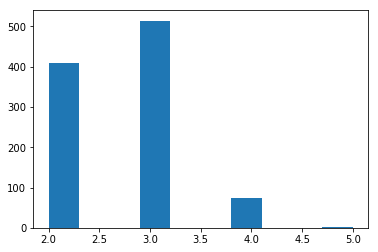

In [7]:
plt.hist([len(i['atendidos']) for i in iteracoes])
plt.show()

# Qual o número esperado de clientes que foram embora até o instante T?

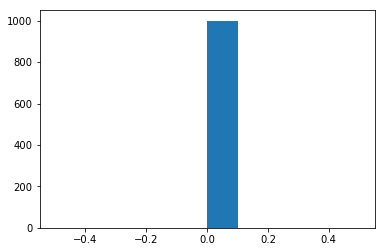

In [8]:
plt.hist([i['rejeicoes'] for i in iteracoes])
plt.show()

# Qual a proporção de clientes que foram embora?

In [9]:
media_rejeicoes = mean([i['rejeicoes'] for i in iteracoes])
media_atendimentos = mean([len(i['atendidos']) for i in iteracoes])
media_fila = mean([len(i['fila']) for i in iteracoes])

media_rejeicoes / (media_atendimentos + media_rejeicoes + media_fila)

0.0

# Qual o comprimento esperado da fila no instante T?

In [10]:
mean([len(i['fila']) for i in iteracoes])

0

## Comprimento final da fila em cada iteração

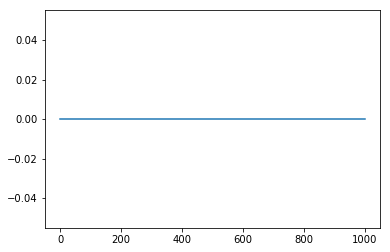

In [11]:
plt.plot([len(i['fila']) for i in iteracoes])
plt.show()

# Considerando apenas os clientes que foram efetivamente atendidos, qual o valor esperado do tempo máximo de permanência dos clientes desde sua chegada até o término de seu atendimento?

In [12]:
tempos_maximos = []
for i in iteracoes:
    tempos_atendimento = []
    for c in i['atendidos']:
        tempos_atendimento.append(c.tempo_atendimento - c.momento_chegada)
    tempos_maximos.append(max(tempos_atendimento))
mean(tempos_maximos)

0.37